In [12]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.3.0
2.4.0


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)



In [15]:
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 955us/step - loss: 22974149433491456.0000 - val_loss: 14617883443200.0000
Epoch 2/20
363/363 [==============================] - 0s 691us/step - loss: 7723970199552.0000 - val_loss: 3417093963776.0000
Epoch 3/20
363/363 [==============================] - 0s 596us/step - loss: 1805568049152.0000 - val_loss: 798785339392.0000
Epoch 4/20
363/363 [==============================] - 0s 621us/step - loss: 422071828480.0000 - val_loss: 186725318656.0000
Epoch 5/20
363/363 [==============================] - 0s 700us/step - loss: 98664218624.0000 - val_loss: 43649114112.0000
Epoch 6/20
363/363 [==============================] - 0s 653us/step - loss: 23063846912.0000 - val_loss: 10203475968.0000
Epoch 7/20
363/363 [==============================] - 0s 706us/step - loss: 5391437312.0000 - val_loss: 2385182720.0000
Epoch 8/20
363/363 [==============================] - 0s 638us/step - loss: 1260309632.0000 - val_loss: 557565056.0000
Epoch 9/20


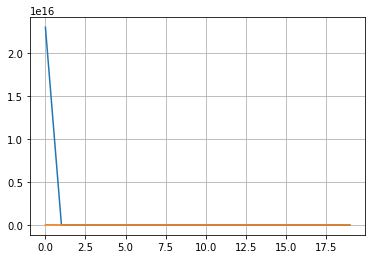

In [17]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.show()

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))

history2 = model.fit(X_train_scaled, y_train, validation_data= (X_test_scaled, y_test), epochs=20)
model.evaluate(X_test_scaled, y_test)


Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 1.9197 - val_loss: 0.9539
Epoch 2/20
363/363 [==============================] - 0s 871us/step - loss: 0.8247 - val_loss: 0.7240
Epoch 3/20
363/363 [==============================] - 0s 843us/step - loss: 0.6937 - val_loss: 0.6534
Epoch 4/20
363/363 [==============================] - 0s 822us/step - loss: 0.6350 - val_loss: 0.6094
Epoch 5/20
363/363 [==============================] - 0s 708us/step - loss: 0.5964 - val_loss: 0.5762
Epoch 6/20
363/363 [==============================] - 0s 593us/step - loss: 0.5664 - val_loss: 0.5485
Epoch 7/20
363/363 [==============================] - 0s 650us/step - loss: 0.5420 - val_loss: 0.5293
Epoch 8/20
363/363 [==============================] - 0s 718us/step - loss: 0.5221 - val_loss: 0.5094
Epoch 9/20
363/363 [==============================] - 0s 679us/step - loss: 0.5047 - val_loss: 0.4931
Epoch 10/20
363/363 [==============================] - 0s 676us/step - loss: 0.4902 

0.42322519421577454

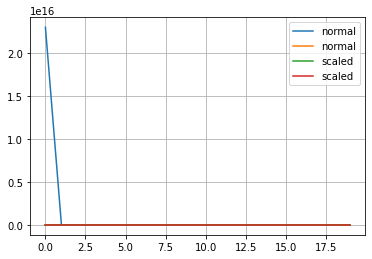

In [21]:
plt.plot(pd.DataFrame(history.history), label='normal')
plt.plot(pd.DataFrame(history2.history), label='scaled')
# plt.plot(pd.DataFrame(history.history['accuracy']), label='normal')
# plt.plot(pd.DataFrame(history2.history['accuracy']), label='scaled')
plt.legend()
plt.grid(True)
plt.show()

# Dane zawsze muszą być przeskalowane